In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define input shape
input_shape = (224, 224, 3)

train_path = '/content/drive/MyDrive/CarDataset/Train'
valid_path = '/content/drive/MyDrive/CarDataset/Test'


In [ ]:
# Load the pre-trained InceptionV3 model
inception_base = InceptionV3(input_shape=input_shape, weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


# New Section

In [ ]:
inception_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
# Freeze the layers of the pre-trained model
for layer in inception_base.layers:
    layer.trainable = False

In [ ]:
from glob import glob
folders = glob('/content/drive/MyDrive/CarDataset/Train/*')

In [ ]:
# Add custom layers for your classification task
x = Flatten()(inception_base.output)
x = Dense(256, activation='relu')(x)
x = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create the model
inception_model = Model(inputs=inception_base.input, outputs=x)


In [ ]:

# Compile the model
inception_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# Print model summary
inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # Rescale pixel values to a range of [0, 1]
                                  shear_range = 0.2, # Randomly apply shearing transformation
                                  zoom_range = 0.2,  # Randomly apply zooming transformation
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CarDataset/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 2324 images belonging to 9 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CarDataset/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 270 images belonging to 9 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r=inception_model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/20
73/73 [==============================] - 1168s 16s/step - loss: 6.4386 - accuracy: 0.5615 - val_loss: 1.3205 - val_accuracy: 0.6667
Epoch 2/20
73/73 [==============================] - 49s 666ms/step - loss: 0.6060 - accuracy: 0.8025 - val_loss: 0.6845 - val_accuracy: 0.7741
Epoch 3/20
73/73 [==============================] - 48s 654ms/step - loss: 0.3720 - accuracy: 0.8735 - val_loss: 0.3344 - val_accuracy: 0.8815
Epoch 4/20
73/73 [==============================] - 49s 667ms/step - loss: 0.3269 - accuracy: 0.8920 - val_loss: 0.5163 - val_accuracy: 0.8370
Epoch 5/20
73/73 [==============================] - 47s 647ms/step - loss: 0.2730 - accuracy: 0.9040 - val_loss: 0.5707 - val_accuracy: 0.8444
Epoch 6/20
73/73 [==============================] - 49s 669ms/step - loss: 0.3377 - accuracy: 0.8873 - val_loss: 0.2921 - val_accuracy: 0.8889
Epoch 7/20
73/73 [==============================] - 47s 645ms/step - loss: 0.2262 - accuracy: 0.9225 - val_loss: 0.3522 - val_accuracy: 0.8889

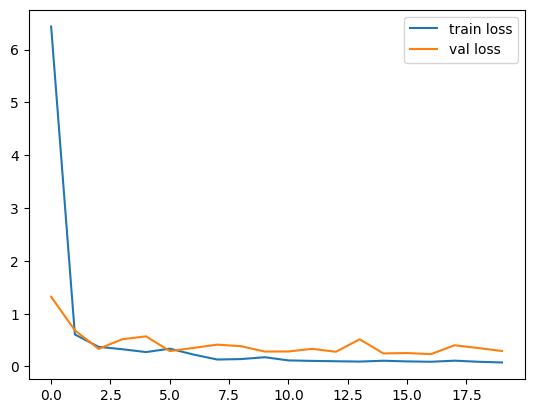

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

# 'model' is your trained inception v3 model above
inception_model.save('model_inceptionModel.h5')


In [ ]:
y_pred = inception_model.predict(test_set)

9/9 [==============================] - 2s 180ms/step


In [ ]:
y_pred

array([[1.4533268e-10, 6.1643266e-17, 5.8940442e-14, ..., 8.4607082e-10,
        7.2511649e-11, 9.9999714e-01],
       [2.2113186e-03, 9.9765623e-01, 1.4702515e-06, ..., 5.5982224e-07,
        1.4363144e-05, 4.8522164e-10],
       [1.4422067e-08, 2.2035778e-20, 6.4885479e-19, ..., 3.2482335e-09,
        1.3522028e-15, 2.2491894e-11],
       ...,
       [1.9875083e-06, 5.2107021e-04, 9.9889708e-01, ..., 1.2153943e-07,
        4.8843486e-07, 2.0500961e-06],
       [2.0420023e-08, 8.7508126e-15, 1.4373172e-12, ..., 1.5992919e-05,
        1.2458837e-07, 9.9998379e-01],
       [1.1628958e-06, 8.5904175e-19, 3.7213558e-19, ..., 2.7773995e-04,
        6.5272705e-12, 1.6060893e-07]], dtype=float32)

In [ ]:
#you're using the NumPy library in Python to work with an array called y_pred and you want to find the index (or class) with the highest predicted value along axis 1.
import numpy as np

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([8, 1, 3, 4, 4, 1, 4, 6, 1, 6, 7, 6, 3, 2, 7, 2, 2, 2, 1, 5, 3, 2,
       7, 1, 5, 1, 7, 2, 1, 4, 5, 0, 3, 7, 4, 2, 6, 0, 8, 1, 5, 5, 4, 3,
       6, 3, 1, 0, 4, 7, 8, 2, 5, 0, 1, 2, 3, 7, 7, 4, 8, 5, 3, 7, 6, 7,
       0, 5, 7, 0, 7, 3, 3, 4, 1, 5, 8, 3, 2, 0, 6, 1, 2, 5, 7, 7, 7, 5,
       1, 7, 8, 4, 2, 3, 6, 8, 0, 8, 3, 5, 3, 0, 0, 8, 8, 6, 1, 7, 3, 0,
       3, 8, 0, 5, 5, 3, 0, 2, 3, 7, 0, 3, 2, 7, 7, 6, 4, 7, 2, 6, 0, 1,
       1, 5, 6, 1, 4, 0, 0, 6, 5, 7, 1, 1, 2, 2, 2, 8, 1, 4, 8, 3, 8, 4,
       5, 5, 2, 5, 5, 0, 3, 4, 4, 5, 6, 3, 0, 2, 5, 1, 2, 3, 4, 6, 4, 0,
       2, 0, 8, 6, 8, 6, 0, 8, 4, 7, 5, 5, 0, 2, 1, 8, 1, 5, 5, 7, 8, 7,
       1, 7, 6, 4, 8, 0, 2, 1, 6, 3, 7, 5, 0, 8, 5, 5, 5, 8, 8, 3, 0, 3,
       0, 1, 0, 4, 1, 3, 8, 6, 4, 6, 3, 8, 7, 3, 4, 5, 0, 1, 5, 3, 4, 8,
       7, 6, 7, 0, 8, 0, 7, 6, 4, 2, 2, 6, 5, 6, 5, 7, 7, 3, 1, 6, 7, 0,
       2, 0, 3, 2, 8, 3])

In [ ]:
#This module is used for loading pre-trained or saved Keras models.

from tensorflow.keras.models import load_model

#This module is used for image preprocessing and augmentation when working with image data.
#It provides functions and classes to load, preprocess, and augment images before feeding them into deep learning models built using TensorFlow's Keras API.
#Common functions include load_img, img_to_array, array_to_img, etc., which help in loading and converting images to NumPy arrays suitable for feeding into a neural network.

from tensorflow.keras.preprocessing import image

In [ ]:
# Load a pre-trained model

model = load_model('model_inceptionModel.h5')

#we can use the loaded model for inference or further training

In [ ]:
# To load an image file from the path within brackets and resize it to the target size(load_img function from TensorFlow's Keras preprocessing module )
img=image.load_img('/content/drive/MyDrive/CarDataset/Test/rio blue/000009.jpg',target_size=(224,224))

In [ ]:
image

In [ ]:
# image.img_to_array(img): This function takes an image object (typically loaded using image.load_img) as input and converts it into a NumPy array.
# variable x will contain a NumPy array representing the image.
x=image.img_to_array(img)

# print the x
x

In [ ]:
#The x.shape attribute is used to determine the shape or dimensions of a NumPy array
#The shape typically consists of three values: (height, width, channels) for a color image or just (height, width) for a grayscale image.
#If it's a color image, the shape will be something like (224, 224, 3), indicating a 224x224 image with 3 channels (Red, Green, Blue).
#If grayscale image output(224,224) with 1 channel

x.shape

In [ ]:
# previously we have done rescaling for all the test dataset images.so,we have to do to the new images also
x=x/255
# print x
x

In [ ]:
#preparing the image data for use with a deep learning model, likely one that uses the Keras framework.
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape                # to check the shape of the preprocessed image data.

#x = np.expand_dims(x, axis=0): This line uses NumPy's np.expand_dims function to add an extra dimension to your image data x. This is often done to convert a single image (which is typically 3D) into a batch of images with a batch size of 1. The axis=0 argument indicates that you want to add the new dimension as the first dimension. After this line, x will become a 4D NumPy array.

#img_data = preprocess_input(x): This line seems to be using a preprocessing function called preprocess_input on your image data x. The specific preprocessing steps depend on the model and framework you are using. It's common to apply preprocessing to normalize the pixel values or perform other operations required by the model. The result is stored in the variable img_data.

#Finally, img_data.shape is used to check the shape of the preprocessed image data. The shape will depend on the preprocessing steps applied, but it will typically be something like (1, height, width, channels) if you expanded a single image into a batch with a batch size of 1.


In [ ]:
#used to make predictions on the input data (img_data) using a pre-trained deep learning model.
model.predict(img_data)

# model: This should be a pre-trained deep learning model that you have loaded or created earlier using TensorFlow's Keras API. The model is capable of performing various tasks such as image classification, object detection, etc., depending on how it was trained.

 #   img_data: This is the input data, typically a preprocessed image or a batch of preprocessed images, that you want to pass to the model for prediction. In your case, it seems to be the result of preprocessing a single image and expanding its dimensions, so it's a 4D NumPy array.

# When you call model.predict(img_data), the model uses its learned weights and architecture to make predictions based on the input data. The output of this operation will be the model's predictions for the provided input data. The shape and content of the predictions will depend on the specific model and task you are working on.

# For example, if you are using an image classification model, the output might be a probability distribution over classes, indicating the likelihood of each class for the given input. You can then extract information from the predictions, such as the predicted class label or class probabilities, to interpret the model's output.


In [ ]:
# used to obtain the predicted class labels from the output of a deep learning model for a given input (img_data).
a=np.argmax(model.predict(img_data), axis=1)

# model.predict(img_data): This part of the code uses the pre-trained deep learning model (model) to make predictions on the input data (img_data). The output of this operation is a prediction, which typically includes a probability distribution over classes for each input.

 #   np.argmax(...): After making predictions, np.argmax is used to find the index (or class label) corresponding to the highest predicted probability for each input in the batch. The axis=1 argument specifies that the maximum value should be found along the second axis, which corresponds to the classes.

  #  a = ...: The result of np.argmax(model.predict(img_data), axis=1) is assigned to the variable a, so a will contain an array of predicted class labels for the inputs in img_data.


In [ ]:
# print a(a will be an array of these predicted class labels)
a